<a href="https://colab.research.google.com/github/dawidkrol/Natural_language_processing_AGH/blob/main/Natural_language_processing_AGH_UST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.probability import FreqDist
from nltk import ngrams

nltk.download('punkt')
nltk.download('stopwords')

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

import urllib

from nltk.corpus import gutenberg
from collections import defaultdict

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Methods

In [ ]:
def top_freq(data, count):
  fq = FreqDist([j for i in data for j in i])
  return fq.most_common(count)

In [ ]:
def generate_ngrams(words, n):
    ngrams_result = []

    for i in words:
      ngrams_result = list(ngrams(i,n))

    return ngrams_result

In [ ]:
def zipf(data, data_count = -1):
  fq = FreqDist([j for i in data for j in i ])
  df = pd.DataFrame(fq.items()).sort_values(by=[1], ascending=False)
  if data_count != -1:
    df = df[0:data_count]
  index = 0
  zipf_w = list()
  for idx, (word, count) in df.iterrows():
    index += 1
    zipf_w.append([idx, word, count, idx*count])
  ranks = [x[0] for x in rows_to_show]
  amount = [x[2] for x in rows_to_show]
  plt.plot(ranks, amount, linestyle='dotted')
  plt.title('Prawo Zipfa')
  plt.xlabel('Ranga')
  plt.xscale('log')
  plt.ylabel('Wystąpienia')
  plt.yscale('log')
  plt.show()

In [ ]:
def ngrams_implementing(data,ngram):
  clean_sents = []
  for s in data:
    clean_sents.append(ngram[s])
  return clean_sents

In [ ]:
def bipartite_graph(lines, number_of_output):
  words_children = {}

  for words in lines:
      for i in range(0, len(words) - 1):
          parent, child = words[i], words[i+1]

          if parent not in words_children:
              words_children[parent] = set()

          words_children[parent].add(child)

  words_children = dict(sorted(words_children.items(), key=lambda x: len(x[1]), reverse=True)[0:number_of_output])
  return words_children

# Currier's transcription

In [ ]:
url = 'https://www.ic.unicamp.br/~stolfi/voynich/mirror/reeds/docs/FSG.txt'
downl = urllib.request.urlopen(url).read().decode('utf-8')
sent_tokens = sent_tokenize(downl)

In [ ]:
data = list()
for i in range(len(sent_tokens)):
  tmp = (word_tokenize(sent_tokens[i]))
  tmp_list = []
  for j in tmp:
    tmp_list += (j.split(','))
  data.append(tmp_list)

In [ ]:
stpwords = list([',','#',':','.','','-','_','=', '\'', 'Currier','\'s'])
dt_stp = list()
for i in data:
  tmp = list()
  for w in i:
    if w not in stpwords:
      if (len(w) > 1):
        tmp.append(w.replace(',', ' ').replace('-', '').replace('=', ''))
  dt_stp.append(tmp)

In [ ]:
from tabulate import tabulate

rows_to_show = []

for idx, (word, count) in enumerate(top_freq(dt_stp, None), 1):
    rows_to_show.append([idx, word, count, idx*count])

print(tabulate(rows_to_show[0:10], headers=['Ranga', 'Słowo', 'Wystąpienia', 'R * L'], tablefmt='pretty'))

+-------+---------+-------------+-------+
| Ranga |  Słowo  | Wystąpienia | R * L |
+-------+---------+-------------+-------+
|   1   |   8AM   |     968     |  968  |
|   2   |  TC8G   |     498     |  996  |
|   3   |   OE    |     438     | 1314  |
|   4   |  4ODAM  |     431     | 1724  |
|   5   |  SC8G   |     426     | 2130  |
|   6   |   AM    |     402     | 2412  |
|   7   |   TOE   |     393     | 2751  |
|   8   |   TCG   |     342     | 2736  |
|   9   | 4ODCC8G |     302     | 2718  |
|  10   |   8AR   |     297     | 2970  |
+-------+---------+-------------+-------+


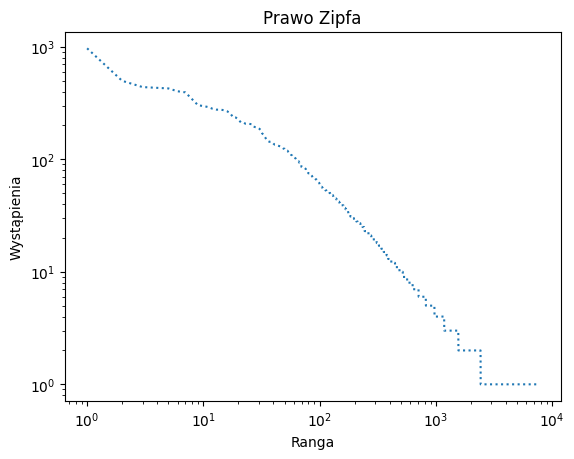

In [ ]:
import matplotlib.pyplot as plt

ranks = [x[0] for x in rows_to_show]
amount = [x[2] for x in rows_to_show]

plt.plot(ranks, amount, linestyle='dotted')
plt.title('Prawo Zipfa')
plt.xlabel('Ranga')
plt.xscale('log')
plt.ylabel('Wystąpienia')
plt.yscale('log')
plt.show()

In [ ]:
bigrams_result = generate_ngrams(dt_stp, 2)

print("Bigramy:")
for bigram in bigrams_result[0:10]:
    print(f"('{bigram[0]}', '{bigram[1]}')")

Bigramy:
('OESCG', '4OHAM')
('4OHAM', 'OE')
('OE', 'S0G')
('S0G', '4ODCSC')
('4ODCSC', 'ESCOD')
('ESCOD', 'S8G')
('S8G', '4PZCG')
('4PZCG', 'TCHG')
('TCHG', '8AR')
('8AR', 'OHCCG')


In [ ]:
trigrams_result = generate_ngrams(dt_stp, 3)

print("Trigramy:")
for trigram in trigrams_result[0:10]:
    print(f"('{trigram[0]}', '{trigram[1]}', '{trigram[2]}')")

Trigramy:
('OESCG', '4OHAM', 'OE')
('4OHAM', 'OE', 'S0G')
('OE', 'S0G', '4ODCSC')
('S0G', '4ODCSC', 'ESCOD')
('4ODCSC', 'ESCOD', 'S8G')
('ESCOD', 'S8G', '4PZCG')
('S8G', '4PZCG', 'TCHG')
('4PZCG', 'TCHG', '8AR')
('TCHG', '8AR', 'OHCCG')
('8AR', 'OHCCG', 'ETCC2')


In [ ]:
forgrams_result = generate_ngrams(dt_stp, 4)

print("Kwadrigramy:")
for forgram in forgrams_result[0:10]:
    print(f"('{forgram[0]}', '{forgram[1]}', '{forgram[2]}', '{forgram[3]}')")

Kwadrigramy:
('OESCG', '4OHAM', 'OE', 'S0G')
('4OHAM', 'OE', 'S0G', '4ODCSC')
('OE', 'S0G', '4ODCSC', 'ESCOD')
('S0G', '4ODCSC', 'ESCOD', 'S8G')
('4ODCSC', 'ESCOD', 'S8G', '4PZCG')
('ESCOD', 'S8G', '4PZCG', 'TCHG')
('S8G', '4PZCG', 'TCHG', '8AR')
('4PZCG', 'TCHG', '8AR', 'OHCCG')
('TCHG', '8AR', 'OHCCG', 'ETCC2')
('8AR', 'OHCCG', 'ETCC2', 'OE')


In [ ]:
words_children = bipartite_graph(dt_stp,10)

for parent, childs in words_children.items():
    print(f'{parent}:\t{len(childs)}')

8AM:	548
TC8G:	282
AM:	279
OE:	250
4ODAM:	233
TCG:	226
SC8G:	224
TOE:	222
8AR:	208
folio:	204


# Estonian language

In [ ]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32622 sha256=fcb3d61c7c1cc7c5263cc4726a4c4080e868a507d60030687cd8353a29e4f71e
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [ ]:
from tika import parser

def getting_data(url):
  raw = parser.from_file(url)
  return raw['content']

In [ ]:
et_data_pdf = getting_data('https://ojs.utlib.ee/index.php/EAA/article/download/1392/1331')
et_data_pdf += getting_data('https://ojs.utlib.ee/index.php/EAA/article/download/1033/1003')
et_data_pdf += getting_data('https://pohiseadus.riigioigus.ee/system/files/inline-files/prof_robert_alexy._pohioigused_eesti_pohiseaduses.pdf')
et_data_pdf += getting_data('https://core.ac.uk/download/pdf/14492679.pdf')

2023-12-13 16:21:41,983 [MainThread  ] [INFO ]  Retrieving https://ojs.utlib.ee/index.php/EAA/article/download/1392/1331 to /tmp/index.php-eaa-article-download-1392-1331.
INFO:tika.tika:Retrieving https://ojs.utlib.ee/index.php/EAA/article/download/1392/1331 to /tmp/index.php-eaa-article-download-1392-1331.
2023-12-13 16:21:45,496 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-12-13 16:21:49,028 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-

In [ ]:
et_tokens_sent = sent_tokenize(et_data_pdf)
print(len(et_tokens_sent))

6068


In [ ]:
et_data_tokens = list()
for i in range(len(et_tokens_sent)):
  et_data_tokens.append(word_tokenize(et_tokens_sent[i]))

In [ ]:
stopwords_et = getting_data('https://datadoi.ee/bitstream/handle/33/78/estonian-stopwords.txt?sequence=1&isAllowed=y')
stopwords_et = stopwords_et.split('\n')
stopwords_et += ['–','v.','siiski','näiteks','seega','ole','kohta','nagu','ning','vaid','ainult','võib','mitte','lg','või','ka','aga','ei','et','ja','jah','kas','kui','kõik','ma','me','mida','midagi','mind','minu','mis','mu','mul','mulle','nad','nii','oled','olen','oli','oma','on','pole','sa','seda','see','selle','siin','siis','ta','te','ära',]

2023-12-13 18:22:35,867 [MainThread  ] [INFO ]  Retrieving https://datadoi.ee/bitstream/handle/33/78/estonian-stopwords.txt?sequence=1&isAllowed=y to /tmp/bitstream-handle-33-78-estonian-stopwords.txt.
INFO:tika.tika:Retrieving https://datadoi.ee/bitstream/handle/33/78/estonian-stopwords.txt?sequence=1&isAllowed=y to /tmp/bitstream-handle-33-78-estonian-stopwords.txt.


In [ ]:
stpwords = list(string.punctuation)
stpwords += (['','"','-','”','“','$','§','...','«','iii','ii','v','ps','—','–'])

et_tokens = list()
for i in et_data_tokens:
  tmp = list()
  for w in i:
    wor = w.lower()
    if (wor not in stpwords) and (wor not in stopwords_et) and (not any(char.isdigit() for char in wor)):
      tmp.append(wor)
  et_tokens.append(tmp)

In [ ]:
from tabulate import tabulate

rows_to_show = []

for idx, (word, count) in enumerate(top_freq(et_tokens, None), 1):
    rows_to_show.append([idx, word, count, idx*count])

print(tabulate(rows_to_show[0:10], headers=['Ranga', 'Słowo', 'Wystąpienia', 'R * L'], tablefmt='pretty'))

+-------+-------------+-------------+-------+
| Ranga |    Słowo    | Wystąpienia | R * L |
+-------+-------------+-------------+-------+
|   1   |    eesti    |     437     |  437  |
|   2   | põhiõiguste |     302     |  604  |
|   3   |    lause    |     287     |  861  |
|   4   |     vrd     |     280     | 1120  |
|   5   |     lk      |     208     | 1040  |
|   6   |   liitub    |     198     | 1188  |
|   7   |  tähendus   |     167     | 1169  |
|   8   |  tuletisi   |     167     | 1336  |
|   9   | põhiseaduse |     164     | 1476  |
|  10   |   seaduse   |     135     | 1350  |
+-------+-------------+-------------+-------+


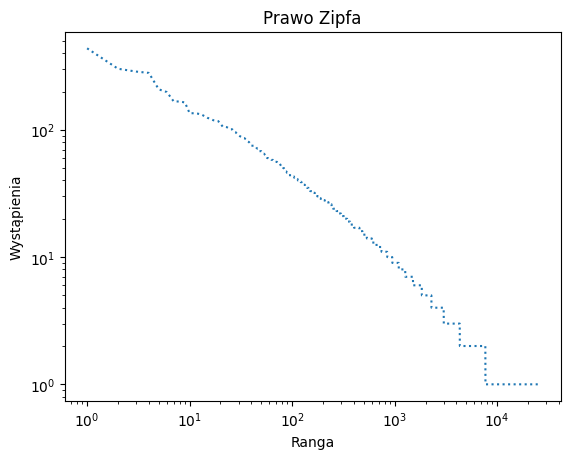

In [ ]:
import matplotlib.pyplot as plt

ranks = [x[0] for x in rows_to_show]
amount = [x[2] for x in rows_to_show]

plt.plot(ranks, amount, linestyle='dotted')
plt.title('Prawo Zipfa')
plt.xlabel('Ranga')
plt.xscale('log')
plt.ylabel('Wystąpienia')
plt.yscale('log')
plt.show()

In [ ]:
bigrams_result = generate_ngrams(et_tokens, 2)

print("Bigramy:")
for bigram in bigrams_result[0:10]:
    print(f"('{bigram[0]}', '{bigram[1]}')")

Bigramy:
('suhtetuletus', 'kokkuvõte')
('kokkuvõte', 'kirjandus')


In [ ]:
trigrams_result = generate_ngrams(et_tokens, 3)

print("Trigramy:")
for trigram in trigrams_result[0:10]:
    print(f"('{trigram[0]}', '{trigram[1]}', '{trigram[2]}')")

Trigramy:
('suhtetuletus', 'kokkuvõte', 'kirjandus')


In [ ]:
forgrams_result = generate_ngrams(et_tokens, 4)

print("Forgramy:")
for forgram in forgrams_result[0:10]:
    print(f"('{forgram[0]}', '{forgram[1]}', '{forgram[2]}', '{forgram[3]}')")

Forgramy:


In [ ]:
words_children = bipartite_graph(et_tokens,10)

for parent, childs in words_children.items():
    print(f'{parent}:\t{len(childs)}')

lause:	172
põhiõiguste:	168
eesti:	136
tähendus:	120
moodustatud:	113
põhiseaduse:	112
tuletisi:	111
tegemist:	98
tuletised:	94
kaitse:	91
